# <font color='blue'>Challenge: Quantum Fourier Transform</font> 

In this challenge you will implement the Quantum Fourier Transform (QFT),
which is one of the fundamental primitives used in designing quantum algorithms


Again, let's import some stuff...

In [ ]:
from pyquil import Program
from pyquil.api import get_qc, WavefunctionSimulator, local_qvm
from pyquil.gates import *
import numpy as np
import os, inspect, sys

import sys
sys.path.insert(0, 'tests/')
sys.path.insert(0, 'auxiliary_functions/')

from test_qft import *
make_wf = WavefunctionSimulator()

## <font color='red'>Part 0: </font> 
Write a function that takes an input bitstring of length $n$, $\mathbf{x} = x_1x_2\dots x_n \in \{0, 1\}^n$ and prepares a corresponding quantum state in the computational basis.


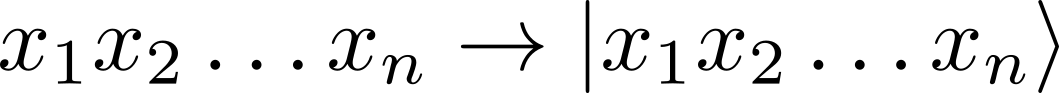

### Example:
(1) 
\begin{align}
\mathbf{x} = 0010 \overset{\mathsf{Prepare}}{\rightarrow} \left|0010\right>
\end{align}

*Note: PyQuil (like most libraries) uses the 'little-endian' convention: A Wavefunction represented as |001> actually means **qubit 0** is in state $\left|1\right>$, while qubits 1, 2 are in state $\left|0\right>$.
This is in contrast to the usual notation which would label the qubits as $\left|100\right>$. Because of this, you need to be slightly careful extracting probabilities from wavefunctions etc..*

*This means that if you print the wavefunction for the above example (1), you will **actually** want to see the state $\left|0100\right>$*

*The motivation for this is described [here](https://arxiv.org/abs/1711.02086).*

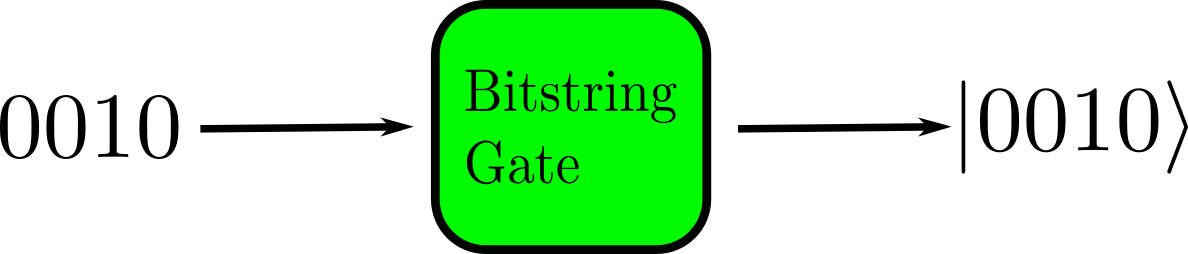

In [ ]:
def prep_comp_state(bitstring):
    circuit = Program()
    circuit += #Add code here
    return circuit

In [ ]:
bitstring = [0,1,0,0,1]
circuit = prep_comp_state(bitstring)

test_prep_comp_bitstring(circuit, bitstring)

## <font color='red'>Part 1: </font> 


The first task is, given an input state in the form, $\left|x_1\right>, x_1 \in\{0, 1\}$, find a transformation (circuit) that will create the following state in the qubit register:

$\frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(\frac{2\pi i x_1}{2}\right)\left|1\right>\right) = \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_1]\right)\left|1\right>\right)$

The state you create will depend on the input state value, $x_1$.

*Hint: The unitary transformation itself you apply must be **independent** of the input, i.e. it must work regardless what the input is. Try checking manually what state you receive when each possible value for the qubit is inputted*

**We are using the binary fraction notation:**

\begin{align}
[0.x_1] &= \frac{x_1}{2},\\
[0.x_1x_2] &= \frac{x_1}{2}+ \frac{x_2}{2^2},\\
[0.x_lx_{l+1}\dots x_{m-1}x_m] &= \frac{x_l}{2}+ \frac{x_{l+1}}{2^2} + \dots + \frac{x_{m-1}}{2^{m-l}}+ \frac{x_{m}}{2^{m-l+1}}
\end{align}

**- This will become useful later**

For each of these parts, you should use a Python function for simplicity. We will assume for now to only use the QVM, and we can access qubit 0.

In [ ]:
circuit = Program()
def funky_single_qubit_state(circuit):
    
    #  circuit += #Add gates here (to act only on qubit -> 0)

    return circuit

Next, you can check the results by inputting the two options for $x_1$; $x_1 = \{0, 1\}$:


In [ ]:
circuit_zero = Program()

circuit_zero += I(0) # Try x_1 = 0: |0> (i.e. do nothing)
circuit_zero = funky_single_qubit_state(circuit_zero)

with local_qvm():
    zero_state_output_wf = make_wf.wavefunction(circuit_zero)

print('\nThe state produced with input |0> is:\n',zero_state_output_wf)

test_zero_output_state(zero_state_output_wf) # Test to check if you got the correct outcome state for this input
circuit_one = Program()

circuit_one += X(0) # Next try x_1 = 1: |1>
circuit_one = funky_single_qubit_state(circuit_one)

with local_qvm():
    one_state_output_wf = make_wf.wavefunction(circuit_one)

print('\nThe state produced with input |1> is:\n',one_state_output_wf)

test_one_output_state(one_state_output_wf) # Test to check if you got the correct outcome state for this input


## <font color='red'>Part 2: </font> 

Now, repeat this for two qubits:

Given the state $\left|x_1x_2\right>$, prepare the following state in two registers:

\begin{align}
\left|x_1x_2\right> &\rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i \left\{\frac{x_1}{2} + \frac{x_2}{2^2}\right\}\right)\left|1\right>\right)\otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(\frac{2\pi i x_2}{2}\right)\left|1\right>\right) \\
&= \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_1x_2]\right)\left|1\right>\right)\otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i[0.x_2]\right)\left|1\right>\right)
\end{align}

*Hint: You will need a controlled gate.*

In [ ]:
circuit = Program()
def funky_two_qubit_state(circuit):
    
    circuit += #Add gates here (to act only on qubits -> 0, 1)

    return circuit

You can repeat the checking here with the **four** options:

*00, 01, 10, 11*


In [ ]:
circuit_zero_zero = Program()


## <font color='red'>Part n: </font> 

Now, repeat this for $n$ qubits:

Given the state $\left|x_1x_2\dots x_n\right>$, prepare the following state in $n$ registers:

\begin{align}
\left|x_1x_2\dots x_n\right> &\rightarrow \left|\psi_n\right> = \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i \left\{\frac{x_1}{2} + \frac{x_2}{2^2} + \dots + \frac{x_n}{2^n}\right\}\right)\left|1\right>\right)\otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i \left\{\frac{x_2}{2}+ \dots + \frac{x_{n}}{2^{n-1}}\right\}\right)\left|1\right>\right) \otimes \dots \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(\frac{2\pi i x_n}{2}\right)\left|1\right>\right)\\
&= \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_1x_2\dots x_n]\right)\left|1\right>\right)\otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_2\dots x_{n-1}x_n]\right)\left|1\right>\right)\otimes\dots\otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i[0.x_n]\right)\left|1\right>\right)
\end{align}

It would be a good idea to define a function which takes in a parameter $n$

In [ ]:
def funky_state_prep(n):
    
    circuit = Program()

    circuit += #Add gates here
    
    return circuit

Next, apply SWAP gates (which you saw in the unitaries challenge) such that the order of the qubits is reversed.

The quantum registers will contain the information previously held in those from which they swapped.

For example, the qubit 'register' $n$ will contain the information held in qubit register $1$ before the SWAP, and vice versa. 

The state should be now be of the form:

\begin{align}
\mathsf{SWAP}_{1, n}\mathsf{SWAP}_{2, n-1}\dots \left|\psi_n\right> &\rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(\frac{2\pi i x_n}{2}\right)\left|1\right>\right) \otimes \dots \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i \left\{\frac{x_2}{2}+ \dots + \frac{x_{n}}{2^{n-1}}\right\}\right)\left|1\right>\right) \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i \left\{\frac{x_1}{2} + \frac{x_2}{2^2} + \dots + \frac{x_n}{2^n}\right\}\right)\left|1\right>\right) \\
&=  \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i[0.x_n]\right)\left|1\right>\right) \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_2\dots x_{n-1}x_n]\right)\left|1\right>\right) \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+ \exp\left(2\pi i [0.x_1x_2\dots x_n]\right)\left|1\right>\right)
\end{align}

In [ ]:
circuit = funky_state_prep(n)

circuit += #Apply SWAP's here



Now it turns out, that by preparing this state, we have prepared the Quantum Fourier Transform of the input state, 
\begin{align}
\left|x\right> &= \left|x_1\dots x_n\right>\\ 
\text{where }x &= \frac{x_1}{2^{n-1}} + \frac{x_2}{2^{n-2}}+\dots + \frac{x_{n-1}}{2^{1}}+ \frac{x_n}{2^{0}}
\end{align}

We can see these are equivalent by doing some maths and writing the coefficient $k$ as its binary expansion:

\begin{align}
\left|x\right> =  \frac{1}{\sqrt{2^n}}\sum\limits_{k=0}^{2^n-1}e^{2\pi ixk}\left|k\right> = \frac{1}{\sqrt{2^n}}\sum\limits_{k_1=0}^{1}\sum\limits_{k_2=0}^{1}\dots \sum\limits_{k_n=0}^{1}e^{2\pi ix\sum_{l=1}^n\frac{k_l}{2^l}}\left|k_1k_2\dots k_n\right> 
\end{align}

It would be incredibly useful if we could directly access the coefficients of this state, which would give us the Fouier transform of the input. Unfortunately we are not so lucky.

We must measure this state in order to get the information about the Fourier Transform out, but we would need to measure it many, many times to get the full thing. 

For this reason, the QFT is typically used as a subroutine in other Quantum Algorithms, and it's use in Shor's Algorithm is the real reason we can factor numbers quickly on a Quantum Computer.